# Advection Equation

Here we solve the advection equation $u_t + a u_x=0$ using as an initial condition a gaussian profile $u(x,t=0)=\exp{[-(x-x_0)^2]}$ with $x_0=5$.

We use a domain $x\in [0,10]$ with periodic boundary conditions.

In [19]:
import numpy as np

#define the speed a
a=1.0

# Define the domain
L = 10.0     # Domain length
nx = 1001    # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

##print(x,'\n',dx) #just a check

# Define the time step and the final time
cf = 0.5
dt = cf*dx/a   # Time step
t_final = 20.0

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)


# Define the initial condition
x0=5
u_initial = np.exp(-(x-x0)**2)

# Initialize the solution array
u_current = u_initial.copy()

#we create arrays where we will store the time and the l2norm
l2norm = []
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time = []
time.append(0.0)

nx= 1001
dx= 0.01
dt= 0.005
Number of iterations= 4000.0


In [20]:
import matplotlib.pyplot as plt
import os
##create directory where to save images
print(os.getcwd())

#os.makedirs('./images')

os.listdir('./')

d:\OneDrive - Università degli Studi di Milano-Bicocca\Documenti\PythonProjects\Numerical_Relativity\Advection


['Advection_FTCS.ipynb',
 'Advection_LaxFriedrichs.ipynb',
 'ffmpeg.exe',
 'images_FTCS',
 'images_LaxFriedrichs',
 'l2norm_FTCS.dat',
 'l2norm_LAX.dat',
 'l2norm_LAXWENDROFF.dat',
 'l2norm_LEAPFROG.dat',
 'README.md']

In [21]:
import math

# Initilize time and iteration counter
t = 0.0
i = 0

#save the initial conditions
plt.plot(x, u_current)
plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.savefig('./images_LaxFriedrichs/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

#solve the advection equation
while t < t_final:
    print(math.ceil(100*t/t_final), "%", end='\r')
    
    # Compute the new solution using the FTCS method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions
    u_next = 0.5*(np.roll(u_current, -1) + np.roll(u_current, 1)) - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))    
    
    # Update the solution
    u_current = u_next.copy()
    
    # Advance the time 
    t += dt
    i += 1
    
    # Compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)
    
    # Plot the current result and save in an image every 10 iterations
    if (i%10==0):
        plt.plot(x, u_current)
        plt.title('Time='+str(round(t,2)))
        plt.ylim(0,1.1)
        plt.savefig('./images_LaxFriedrichs/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()

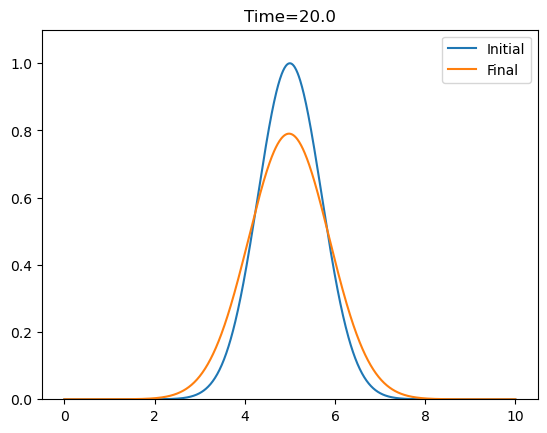

In [22]:
# Plot the final solution
plt.plot(x, u_initial, label='Initial')
plt.plot(x, u_current, label='Final')
plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.legend()
plt.show()

In [23]:
# set the directory where your images are stored
directory = "./images_LaxFriedrichs/"

# get the list of image files in the directory
files = os.listdir(directory)

print(files, '\n')

# sort the files in alphanumeric order
files=sorted(files)

print(files)

['1000points.mp4', '100points.mp4', '100points.png', 'fig_00000.png', 'fig_00010.png', 'fig_00020.png', 'fig_00030.png', 'fig_00040.png', 'fig_00050.png', 'fig_00060.png', 'fig_00070.png', 'fig_00080.png', 'fig_00090.png', 'fig_00100.png', 'fig_00110.png', 'fig_00120.png', 'fig_00130.png', 'fig_00140.png', 'fig_00150.png', 'fig_00160.png', 'fig_00170.png', 'fig_00180.png', 'fig_00190.png', 'fig_00200.png', 'fig_00210.png', 'fig_00220.png', 'fig_00230.png', 'fig_00240.png', 'fig_00250.png', 'fig_00260.png', 'fig_00270.png', 'fig_00280.png', 'fig_00290.png', 'fig_00300.png', 'fig_00310.png', 'fig_00320.png', 'fig_00330.png', 'fig_00340.png', 'fig_00350.png', 'fig_00360.png', 'fig_00370.png', 'fig_00380.png', 'fig_00390.png', 'fig_00400.png', 'fig_00410.png', 'fig_00420.png', 'fig_00430.png', 'fig_00440.png', 'fig_00450.png', 'fig_00460.png', 'fig_00470.png', 'fig_00480.png', 'fig_00490.png', 'fig_00500.png', 'fig_00510.png', 'fig_00520.png', 'fig_00530.png', 'fig_00540.png', 'fig_00550.p

In [24]:
import imageio
with imageio.get_writer('./images_LaxFriedrichs/movie.mp4', mode='I', quality=10) as writer:
    for file in files:
        image = imageio.imread('./images_LaxFriedrichs/'+file)
        writer.append_data(image)
        
files=[]

C:\Users\marco\AppData\Local\Temp\ipykernel_8556\813428916.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('./images_LaxFriedrichs/'+file)


RuntimeError: Format FFMPEG cannot read in i mode

In [25]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="./images_LaxFriedrichs/movie.mp4" type="video/mp4">
</video></div>""")

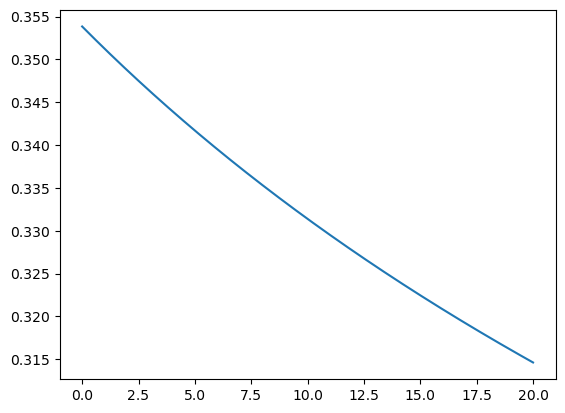

In [26]:
plt.plot(time,l2norm)
plt.show()

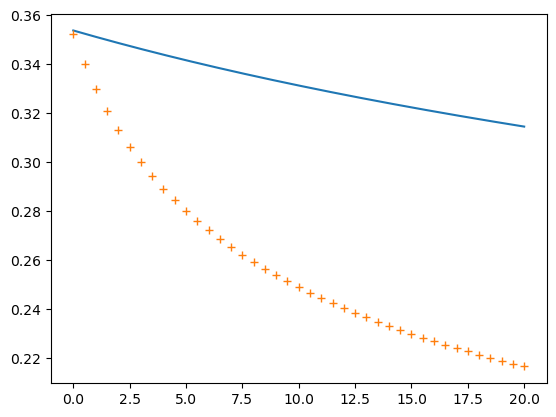

In [27]:
#Compare with data stored
l2_saved=np.genfromtxt('./l2norm_LAX.dat', comments='#')
plt.plot(time,l2norm)
plt.plot(l2_saved[:,0], l2_saved[:,1], '+')
plt.savefig('./images_LaxFriedrichs/l2norm.png', dpi=200)
plt.show()